## Spatial Data Science (GEO6119)

---

# Lab 6 (Part A): Choropleth Map

In this lab, you will create choropleth map from a GeoDataFrame. You will compare the maps using different classification methods.


<br>
Instructor: Yi Qiang (qiangy@usf.edu)<br>

---

## 1. Install New Libraries

[libpysal](https://pysal.org/libpysal/) is a Python library includes many useful spatial datasets and analytical tools. [contextily](https://contextily.readthedocs.io/en/latest/) is a library to retrieve tile maps from the internet and add those tiles as basemap to other maps.

1. Please open Anaconda Prompt, and use the command `conda activate geo` to activate the "geo" environment that you created in the previous lab. 

2. Install libpysal using the following command:

    `conda install -c conda-forge libpysal`
    
3. Install contextily using the following command:

    `conda install -c conda-forge contextily`
    
4. Run the following code to import libpysal and other needed packages.

In [1]:
import libpysal
import contextily as cx

import geopandas as gpd
import matplotlib.pyplot as plt

#set default plot size
plt.rcParams['figure.figsize'] = [10, 10]

## 2. Read and Explore the Dataset

Read the shapefile `south.shp` into a GeoDataFrame `gdf`

In [2]:
# Read south.shp into a GeoDataFrame
gdf = gpd.read_file('other/south.shp')

# Preview the GeoDataFrame
gdf.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Hancock,West Virginia,54,029,54029,54,29,54029,1,1.682864,...,2.557262,0.223645,0.295377,0.332251,0.363934,9.981297,7.8,9.785797,12.604552,"POLYGON ((-80.62805 40.39816, -80.60204 40.480..."
1,Brooke,West Virginia,54,009,54009,54,9,54009,1,4.607233,...,0.748370,0.220407,0.318453,0.314165,0.350569,10.929337,8.0,10.214990,11.242293,"POLYGON ((-80.52625 40.16245, -80.58760 40.175..."
2,Ohio,West Virginia,54,069,54069,54,69,54069,1,0.974132,...,3.310334,0.272398,0.358454,0.376963,0.390534,15.621643,12.9,14.716681,17.574021,"POLYGON ((-80.52517 40.02275, -80.73843 40.035..."
3,Marshall,West Virginia,54,051,54051,54,51,54051,1,0.876248,...,0.546097,0.227647,0.319580,0.320953,0.377346,11.962834,8.8,8.803253,13.564159,"POLYGON ((-80.52447 39.72113, -80.83248 39.718..."
4,New Castle,Delaware,10,003,10003,10,3,10003,1,4.228385,...,16.480294,0.256106,0.329678,0.365830,0.332703,12.035714,10.7,15.169480,16.380903,"POLYGON ((-75.77270 39.38301, -75.79144 39.723..."


The `gdf` consists of a number of columns whose names are in special codings. You can print all columns in `gdf`:

In [3]:
gdf.columns

Index(['NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS', 'STFIPS',
       'COFIPS', 'FIPSNO', 'SOUTH', 'HR60', 'HR70', 'HR80', 'HR90', 'HC60',
       'HC70', 'HC80', 'HC90', 'PO60', 'PO70', 'PO80', 'PO90', 'RD60', 'RD70',
       'RD80', 'RD90', 'PS60', 'PS70', 'PS80', 'PS90', 'UE60', 'UE70', 'UE80',
       'UE90', 'DV60', 'DV70', 'DV80', 'DV90', 'MA60', 'MA70', 'MA80', 'MA90',
       'POL60', 'POL70', 'POL80', 'POL90', 'DNL60', 'DNL70', 'DNL80', 'DNL90',
       'MFIL59', 'MFIL69', 'MFIL79', 'MFIL89', 'FP59', 'FP69', 'FP79', 'FP89',
       'BLK60', 'BLK70', 'BLK80', 'BLK90', 'GI59', 'GI69', 'GI79', 'GI89',
       'FH60', 'FH70', 'FH80', 'FH90', 'geometry'],
      dtype='object')

The meanings of the columns are as follows:


| Variable | Description |
| :---        | :---       |
|NAME|	county name|
|STATE_NAME|	state name|
|STATE_FIPS|	state fips code (character)|
|CNTY_FIPS|	county fips code (character)|
|FIPS|	combined state and county fips code (character)|
|STFIPS|	state fips code (numeric)|
|COFIPS|	county fips code (numeric)|
|FIPSNO|	fips code as numeric variable|
|SOUTH|	dummy variable for Southern counties (South = 1)|
|HR**|	homicide rate per 100,000 (1960, 1970, 1980, 1990)|
|HC**|	homicide count, three year average centered on 1960, 1970, 1980, 1990|
|PO**|	county population, 1960, 1970, 1980, 1990|
|RD**|	resource deprivation 1960, 1970, 1980, 1990 (principal component, see Codebook for details)|
|PS**|	population structure 1960, 1970, 1980, 1990 (principal component, see Codebook for details)|
|UE**|	unemployment rate 1960, 1970, 1980, 1990|
|DV**|	divorce rate 1960, 1970, 1980, 1990 (% males over 14 divorced)|
|MA**|	median age 1960, 1970, 1980, 1990|
|POL**|	log of population 1960, 1970, 1980, 1990|
|DNL**|	log of population density 1960, 1970, 1980, 1990|
|MFIL**|	log of median family income 1960, 1970, 1980, 1990|
|FP**|	% families below poverty 1960, 1970, 1980, 1990 (see Codebook for details)|
|BLK**|	% black 1960, 1970, 1980, 1990|
|GI**|	Gini index of family income inequality 1960, 1970, 1980, 1990|
|FH**|	% female headed households 1960, 1970, 1980, 1990|

source: https://geodacenter.github.io/data-and-lab/south/

## 3. Project the GeoDataFrame

We first plot the geometries of `gdf` in a map

<AxesSubplot:>

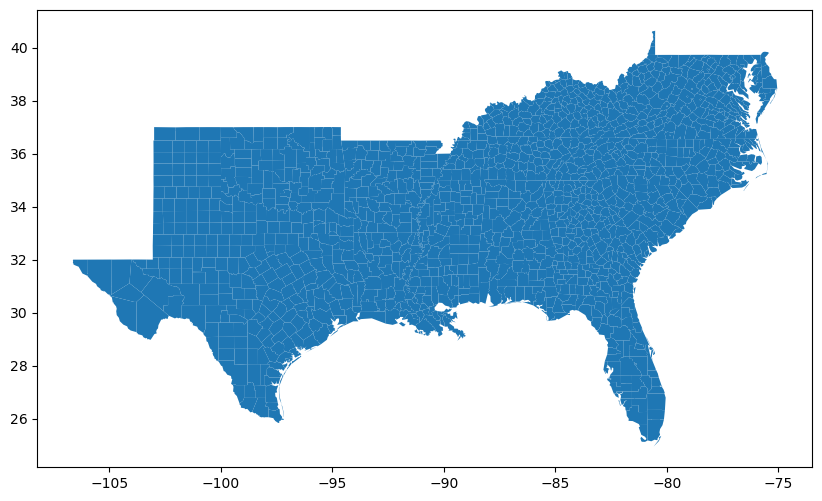

In [4]:
gdf.plot()

The map shows that the geometries `gdf` is not projected. We can confirm that by checking the Coordinate Reference System (CRS) of `gdf`.

In [5]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

It is recommanded to create a choropleth map in an equal-area projection. Next, we project the `gdf` into the Albers Equal Area Conic projection. You have done this in the previous lab. We save the projected geodataframe to `gdf2`

<AxesSubplot:>

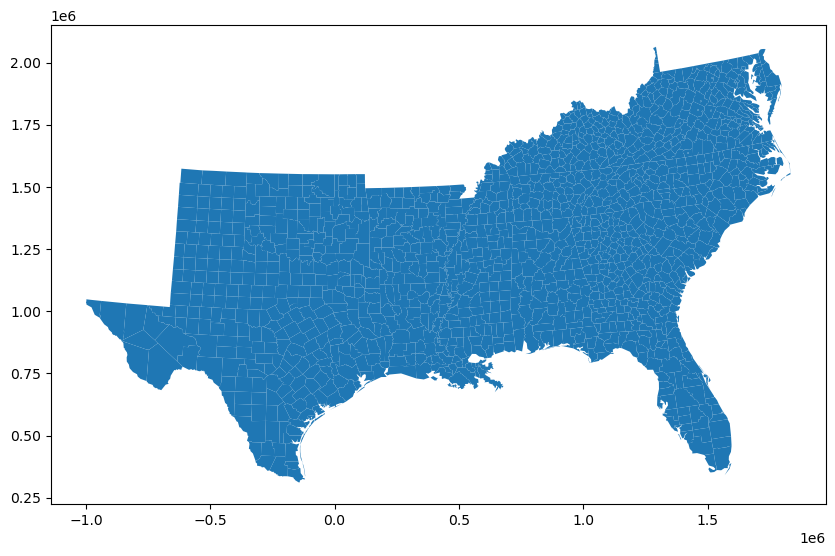

In [6]:
# Project gdf to the Albers equal area conic projection, and store the projected geodataframe in us2
gdf2 = gdf.to_crs(5070)

# plot gdf2
gdf2.plot()

Now the map has been projected to the Albers Equal Area Conic projection.

Adding a basemap can show background information of the geometries. In Python, you can use the `contextily` library to add a basemap to the map.

You can learn more about the `add_basemap` function from [its documentation](https://contextily.readthedocs.io/en/latest/reference.html#plotting-basemaps).

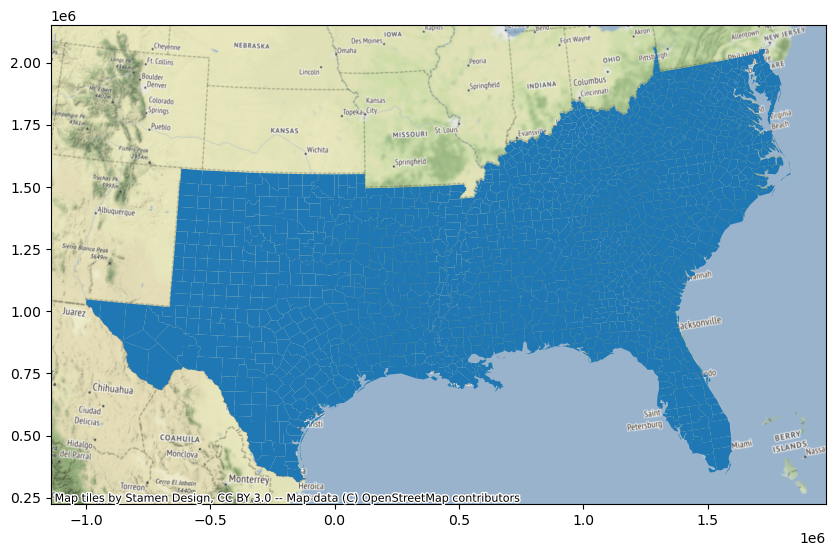

In [7]:
# plot gdf2, and save the plot in a canvas "ax"
ax = gdf2.plot()

# Adding a basemap to the canvas, also project the basemap in the projection of gdf2
cx.add_basemap(ax,crs=gdf2.crs)

In addition to the default basemap, you can choose basemap from a number of basemap tile providers.

In [8]:
# Print all basemap providers
cx.providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://{s}.tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'OpenSeaMap': {'url': 'https://tiles.openseamap.org/seamark/{z}/{x}/{y}.png',
  'html_attribution': 'Map data: &copy; <a href="http://www.openseamap.org">OpenSeaMap</a> contributors',
  'attribution': 'Map data: (C) OpenSeaMap contributors',
  'name': 'OpenSeaMap'},
 'OPNVKarte': {'url': 'https://tileserver.memomaps.de/tilegen/{z}/{x}/{y}.png',
  'max_zoom': 18,
  'html_attribution': 'Map <a href="https://memomaps.de/">memomaps.de</a> <a href="http://creativecommons.org/licenses/by-sa/2.0/">CC-BY-SA</a>, map data &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'attribution': 'Map memomaps.de CC-BY-SA, map data (C) OpenStreetMap contributors',
  'name': 'OPNVKarte'},
 'OpenTopoMap': {'url': 'https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png',
  'max_zoom': 17,
  'html_attribution': 'Map data: &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, <a href="http://viewfinderpanoramas.org">SRTM</a> | Map style: &copy; <a href="https://opentopomap.org">OpenTopoMap</a> (<a href="https://creativecommons.org/licenses/by-sa/3.0/">CC-BY-SA</a>)',
  'attribution': 'Map data: (C) OpenStreetMap contributors, SRTM | Map style: (C) OpenTopoMap (CC-BY-SA)',
  'name': 'OpenTopoMap'},
 'OpenRailwayMap': {'url': 'https://{s}.tiles.openrailwaymap.org/standard/{z}/{x}/{y}.png',
  'max_zoom': 19,
 

Let's use the OpenTopMap as the basemap.

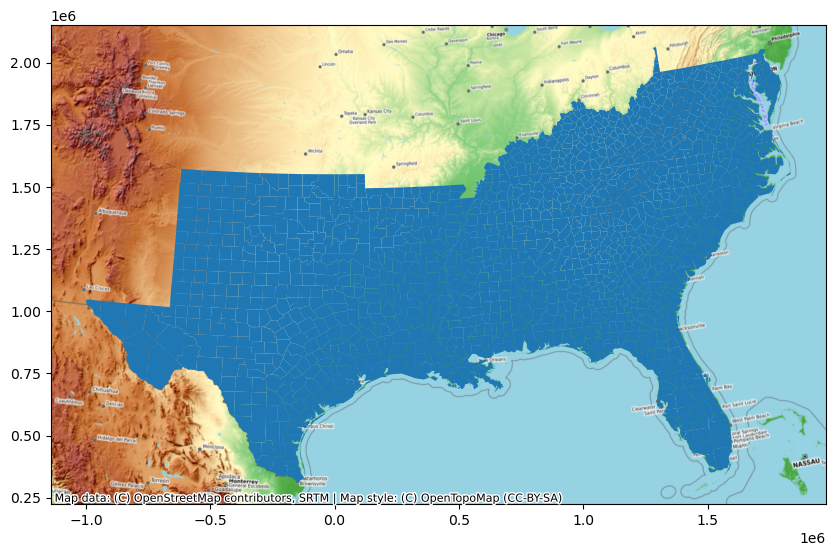

In [9]:
# plot gdf2, and save the plot in a canvas "ax"
ax = gdf2.plot()

# Adding a basemap to the canvas.
cx.add_basemap(ax,source = cx.providers.OpenTopoMap, crs=gdf2.crs)

## 4. Examing Attributes in Histogram

As shown in the above table, the HR90 column stores homicide rate per 100,000 population in 1990. Next, we will create a histogram to examine the distribution of the variable.

<AxesSubplot:>

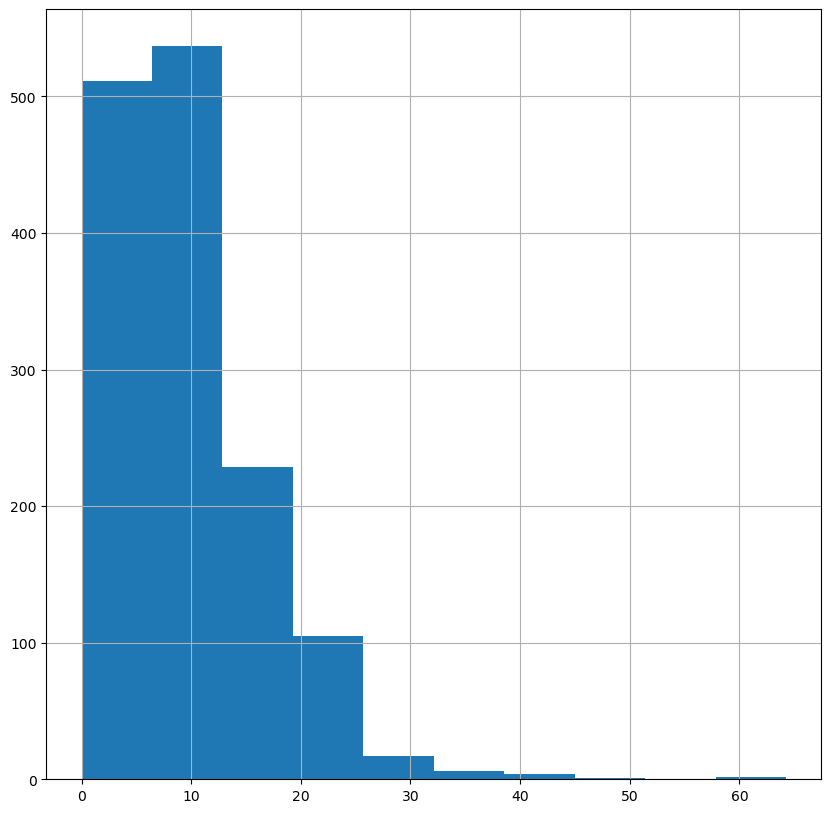

In [10]:
# Create a histogram using the "HR90" column
gdf['HR90'].hist()

The `hist()` function defaultly creates a histogram with 10 bins. But you can increase the number of bins to see the distribution in a finer granularity.

<AxesSubplot:>

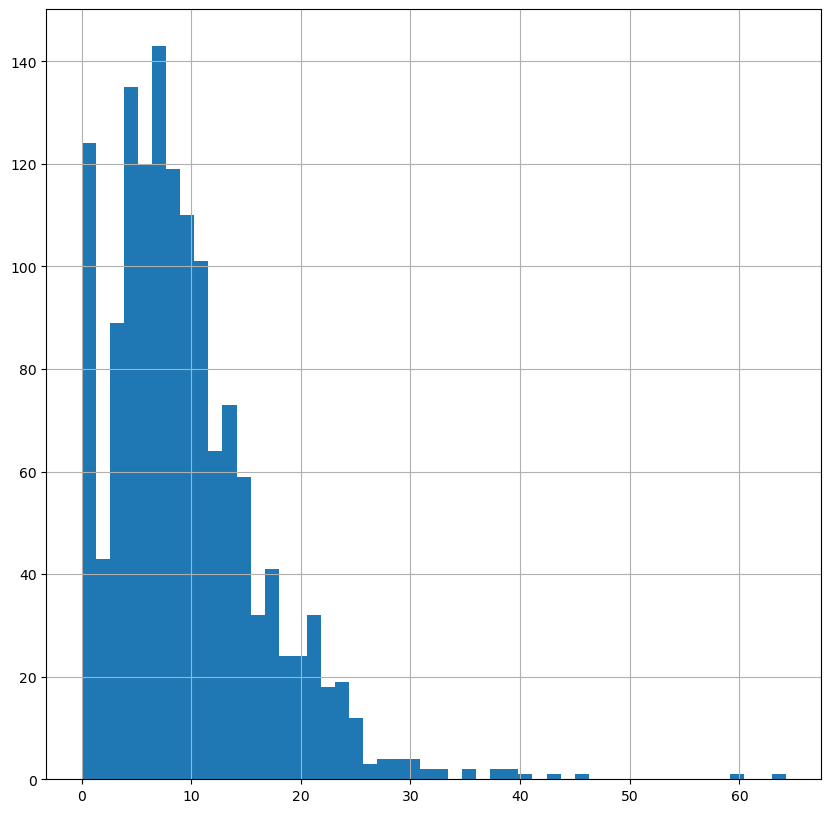

In [11]:
# Create a histogram using the "HR90" column
gdf['HR90'].hist(bins=50)

The histogram shows that the distribution of homicide rate is skewed to the left (low values). The highest frequency (highest bar) appears between 5 and 10. 

## 5. Color Classification of Choropleth Maps

Next, we create choropleth maps of homicide rates using different color classification methods.

### Equal Interval Classification

The `plot` function is a convenient approach to create choropleth map for a GeoDataFrame. The `scheme` argument is used to define color classification methods. You can find all available color schemes in the [documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html).

![](https://raw.githubusercontent.com/qiang-yi/spatial_data_science/main/image/wk5/scheme.jpg)

First, we plot the map using the equal interval classification.

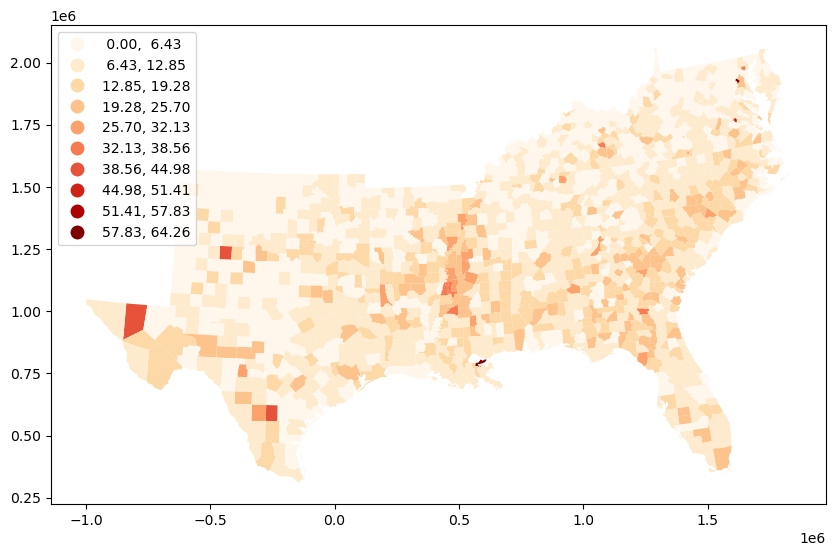

In [12]:
gdf2.plot(column='HR90', cmap='OrRd', scheme='EqualInterval', k = 10, legend = True, legend_kwds={'loc': 'upper left'});

The meaning of the function arguments:

- column: the attribute used to assign color
- cmap: the color map (scheme)
- scheme: classification method
- k: number of color classes
- legend: whether to display a legend
- legend_kwds: other legend settings

You can find the full syntax of the function in its [documentation](You can find all available color schemes in the function's [documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html).

You can also add a basemap to the choropleth map. In Python, multiple spatial datasets are treated as layers in a canvas (also called axis). You can add multiple data layers to an axis. The following code adds the choropleth map and basemap as two layers in the `ax` canvas.

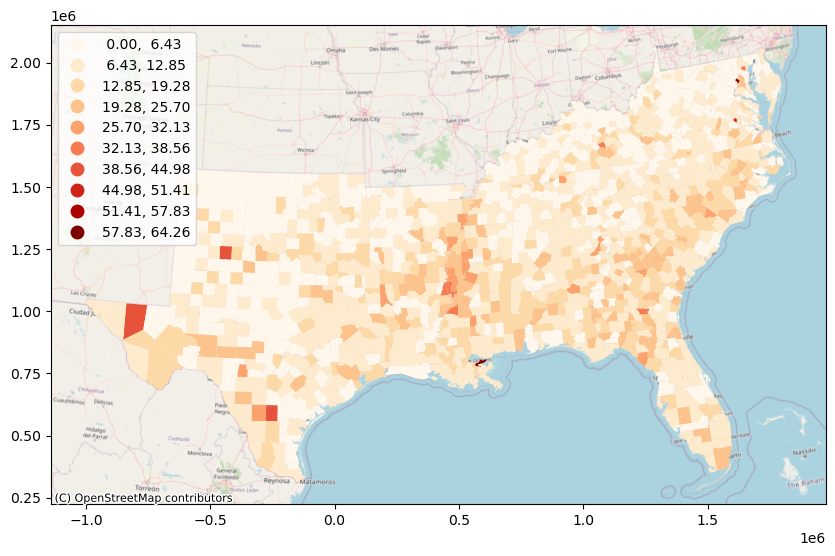

In [13]:
# plot a choropleth map, and save map in a canvas "ax"
ax = gdf2.plot(column='HR90', cmap='OrRd', scheme='EqualInterval', k = 10, legend = True, legend_kwds={'loc': 'upper left'});

# Adding a basemap (OpenStreetMap.Mapnik) to the canvas.
cx.add_basemap(ax,source = cx.providers.OpenStreetMap.Mapnik, crs=gdf2.crs)

The classification method of `plot` is built on the `mapclassify` library (installed with GeoPandas). You use functions in the `mapclassify` library to show how the attribute values are actually classified.

In [14]:
# Import mapclassify
import mapclassify as mc

# show intervals of the Equal Interval classification
mc.EqualInterval(gdf['HR90'], k=10)

EqualInterval         

   Interval      Count
----------------------
[ 0.00,  6.43] |   511
( 6.43, 12.85] |   537
(12.85, 19.28] |   229
(19.28, 25.70] |   105
(25.70, 32.13] |    17
(32.13, 38.56] |     6
(38.56, 44.98] |     4
(44.98, 51.41] |     1
(51.41, 57.83] |     0
(57.83, 64.26] |     2

The `interval` column shows the intervals of value classes. The value range is broken into equal intervals with a 6.42~6.43 increment. The Count column is the number of counties falling in the different intervals.

---
### Question 1 (2 pts): Please write Python code to create three choropleth maps using the classification methods of 1) quantiles, 2) Fiser Jenks, and  3) mean-standard deviation, respectively.

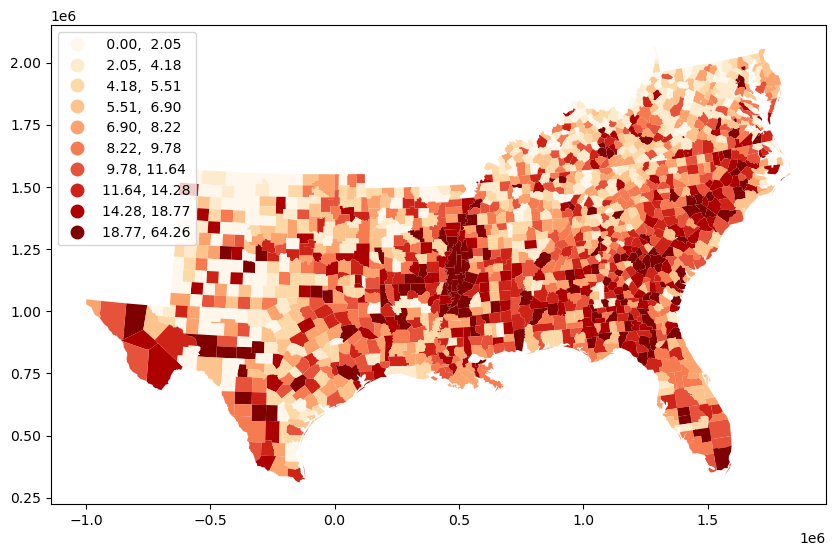

In [15]:
gdf2.plot(column='HR90', cmap='OrRd', scheme='quantiles', k = 10, legend = True, legend_kwds={'loc': 'upper left'});

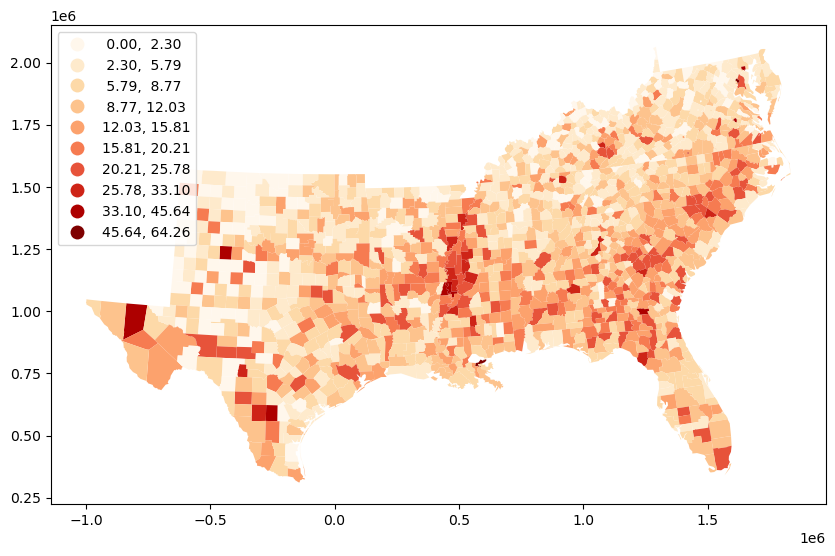

In [16]:
gdf2.plot(column='HR90', cmap='OrRd', scheme='fisher_jenks', k = 10, legend = True, legend_kwds={'loc': 'upper left'});

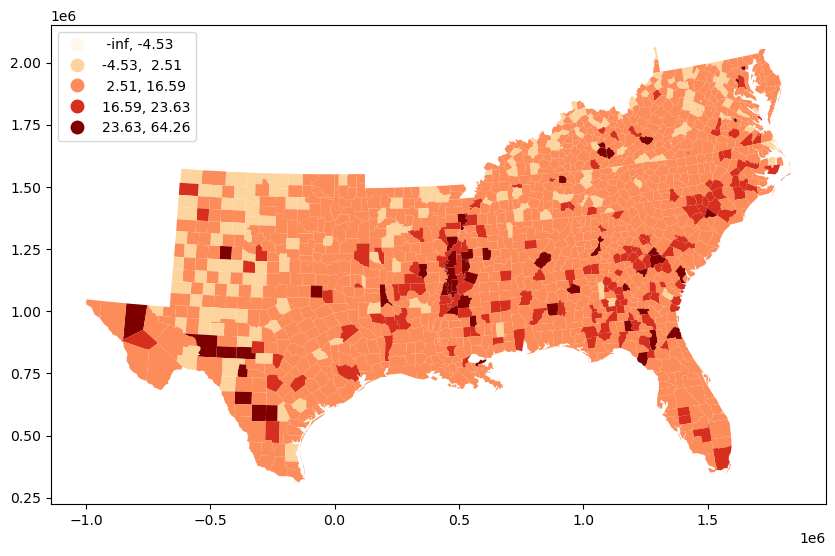

In [17]:
gdf2.plot(column='HR90', cmap='OrRd', scheme='std_mean', k = 10, legend = True, legend_kwds={'loc': 'upper left'});

### Question 2 (2 pts): Compare the four maps (equal interval, quantile, Fisher Jenks and standard deviation-mean) and briefly discuss their difference. Discuss which classification you think is most apprepriate for mapping the homicide data. (__write your discussion in a text cell, no need to write code__)

· The Equal Interval divides the range of attribute values into equal-sized subranges. It is best applied to familiar data ranges, such as percentages and temperature.It is easy to understand and interpret the classes, but can't distinguish clustered values.

· In a quantile classification, each class consists of an equal number of features. A quantile classification works well for linearly distributed data. It is easy for rankings as quantile assigns the same number of data values to each class. But the resulting map can often be misleading, similar features can be placed in adjacent classes, or features with widely different values can be put in the same class.

· The classes of Natural Breaks Jenks (Jenks) are based on natural groupings inherent in the data. Class breaks are created in a way that best groups similar values together and maximize the differences between classes. It is a subjective method that works best with clustered datasets.

· Mean-Standard Deviation classification is implemented by calculating the mean value of the dataset and the standard deviation, placing class breaks at the mean value and each standard deviation value. It works well with normally distributed data.


I think the Natural Breaks Jenks (Jenks) classification is most appropriate for mapping the homicide data as it works well with clustered datasets. Homicides are usually distributed nonrandomly, there are a number of factors that can affect the rate of homicide in different regions. Generally, homicide data is clustered and skewed, with spatial autocorrelation.

### Question 3 (1pt): Please complete the following code to highlight counties where HR90 is greater than 30 on top of the boundaries of other counties. The map should look like below (colors and basemap do not need to be the same).

Hint 1: Consider the counties with high HR90 and all county boundaries as two layers. You display the high HR90 counties on top of all counties. 

Hint 2: You can refer to the [documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) of the `plot` function to see how to plot the selected counties in the 'ax' canvas.

<mark>Please fill the ...... with appropriate Python code</mark>


![](https://raw.githubusercontent.com/qiang-yi/spatial_data_science/main/image/wk5/hi_r.jpg)

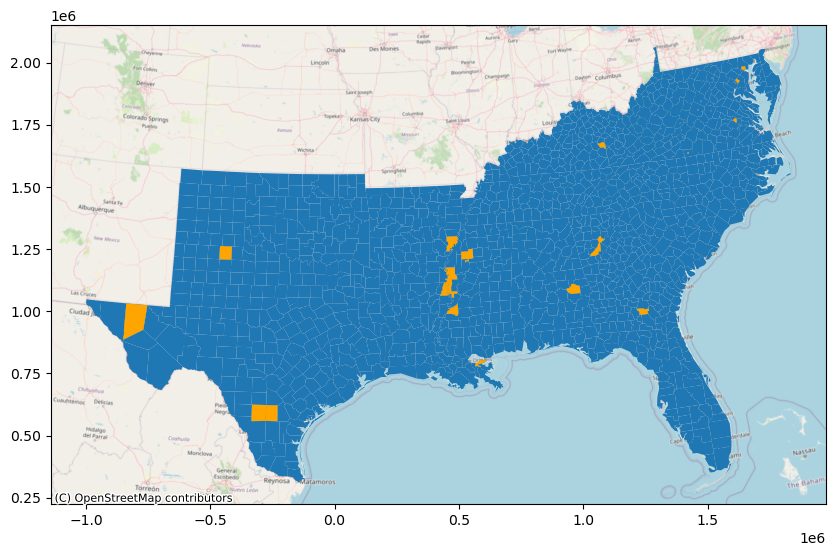

In [18]:
# plot the county boundaries in a canvas "ax"
ax = gdf2.plot()

# Select counties where HR90 is greater than 30, and save the selected county in a geodataframe 'hi_r'
hi_r = gdf2[(gdf2.HR90> 30)]


# plot hi_r in the canvas "ax", and color the counties in orange.
hi_r.plot(ax=ax, color='orange')

# add a basemap 
cx.add_basemap(ax,source = cx.providers.OpenStreetMap.Mapnik, crs=gdf2.crs)